In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [3]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[27, 3], [45, 33], [45, 45], [42, 33], [25], [32], [43, 45], [47, 45], [43, 33], [44, 11, 3, 7]]


In [4]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[27  3  0  0]
 [45 33  0  0]
 [45 45  0  0]
 [42 33  0  0]
 [25  0  0  0]
 [32  0  0  0]
 [43 45  0  0]
 [47 45  0  0]
 [43 33  0  0]
 [44 11  3  7]]


## Dense Model

In [5]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
# model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# fit the model
model.fit(padded_docs, labels, epochs=25, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Instructions for updating:
Use tf.cast instead.
Accuracy: 80.000001


## LSTM model

In [8]:
# define the model
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 8, input_length=max_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               43600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# fit the model
model_lstm.fit(padded_docs, labels, epochs=25, verbose=0)
# evaluate the model
loss, accuracy = model_lstm.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [11]:
def Text2Pad(string_array):
    pad_seq = []
    encoded_docs1 = [one_hot(string, vocab_size) for string in string_array]
    padded_docs1 = pad_sequences(encoded_docs1, maxlen=max_length, padding='post')
    pad_seq.append(padded_docs1)
    return pad_seq

def EvalModel(model, model_name):
    # model.predict return bunch of array with shape of (n,1) but labels has shape of (n) to plot both in same graph wee need to reshpe to (n,1) to (n)
    predY = model.predict(padded_docs).reshape(10)
    TestData = Text2Pad(['Poor work'])
    pred = model.predict(TestData)[0][0]
    print('Input : Poor work, Output: ',pred)
    if pred > 0.5:
        print('Positive with ', np.round(pred * 100, 2), '% Confidence')
    else:
        print('Negative with ', np.round(100 - pred, 2), '% Confidence')
    plt.plot(labels, color='red', label='Actual')
    plt.plot(predY, color='blue', label='Predicted')
    plt.legend(loc='upper right')
    plt.title('Accuracy Comparision - '+model_name)
    plt.show()

Input : Poor work, Output:  0.5148911
Positive with  51.49 % Confidence


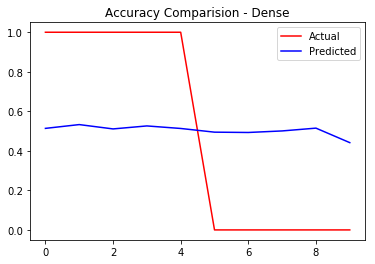

In [12]:
EvalModel(model, 'Dense')

Input : Poor work, Output:  0.48442882
Negative with  99.52 % Confidence


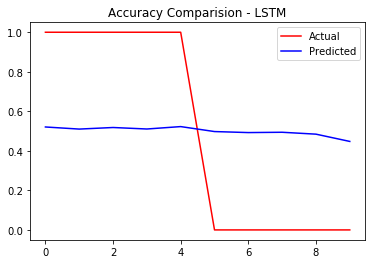

In [13]:
EvalModel(model_lstm, 'LSTM')

#### Dense Model giving no sense of predicted values from the above example

Because word : <b>Poor work</b> , gives Positive in dense model, but LSTM model did sensible prediction

## Fit with High Epochs

In [14]:
# fit the model
model_lstm.fit(padded_docs, labels, epochs=250, verbose=0)
model.fit(padded_docs, labels, epochs=250, verbose=0)

Input : Poor work, Output:  0.32828632
Negative with  99.67 % Confidence


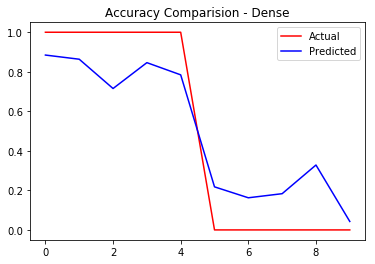

In [15]:
EvalModel(model, 'Dense')

Input : Poor work, Output:  0.00013603193
Negative with  100.0 % Confidence


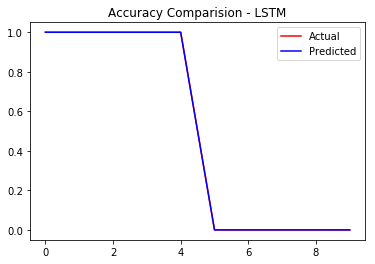

In [16]:
EvalModel(model_lstm, 'LSTM')

## With High epochs LSTM model done perfect Fit